In [13]:
###########################################################
# Programa: Circuitos_2_lab_2_RLC_paralelo
# Data criação: 20/03/2021; Data ultima comp: 28/03/2021 
# Autor: Fernando Cardoso ; Versão 2.0
# Descrição: O programa deve calcular as respostas de 
#            frequencia de um RLC paralelo
# Modificações: for para calcular multiplos graficos 
###########################################################
################ Declaração das biblioteca#################
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from datetime import datetime

In [14]:
################ Declaração das definições#################
R=200.0                                   #definir o valor da resistencia em ohms
R0=100.0
L=1.0                                      #definir o valor da indutância em H
C=0.1*10**(-6)                           #definir o valor da capacitancia em F
A=10.0                                  #definir o valor da amplitude em V
numero=5                                 #nuemro de frequencias 
lista=[0.0]*numero                       #arrys de zeros
V_1=np.array(lista)
I_1=np.array(lista)                      #corrente 1
fase_1=np.array(lista)                   #fase sobre o Resistor
V_2=np.array(lista)                      #tensao sobre o indutor
I_2=np.array(lista)
fase_2=np.array(lista)                   #fase sobre o indutor  
V_3=np.array(lista)                      #tensao sobre o capacitor
I_3=np.array(lista)
fase_3=np.array(lista)                   #fase sobre o capacitor
V_C=np.array(lista) 
V_L=np.array(lista) 
fase_C=np.array(lista) 
fase_L=np.array(lista) 

In [15]:
############ Calculo dos parametros naturais #############
R1=R+R0
w0=mt.sqrt((1/(L*C)))
g=((C*mt.pow(R1,2)-C*mt.pow(R0,2)+L)/R1)*w0
w=np.array([0.2,0.75,1,2,5])*w0  # os percentuais da frequencia natural
print(w0/(2*np.pi))
print(g)

503.2921210448704
10.625252938165756


In [16]:
#################### Definição as FT  #####################
def H_IC(w):
    H=w*mt.sqrt((mt.pow(w,2)+mt.pow((R1-R0)/L,2))/(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(g*w0*w,2)))/R1
    return H
def H_IL(w):
    H=mt.pow(w0,2)*mt.sqrt((1+mt.pow((R1-R0)*C*w,2))/(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(g*w0*w,2)))/R1
    return H
def H_I(w):
    H=mt.sqrt((mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow((R1-R0)*w*(C+1/L),2))/(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(g*w0*w,2)))/R1
    return H

def theta_1(w):
    a=(R1-R0)*w*(C+1/L)
    b=mt.pow(w0,2)-mt.pow(w,2)
    c=mt.pow(w0,2)-mt.pow(w,2)
    d=g*w0*w
    theta=mt.atan2(a*c+b*d,b*c-a*c)*360/(2*np.pi)
    return theta

def theta_C(w):
    a=(R1-R0)/L
    b=-w0
    c=mt.pow(w0,2)-mt.pow(w,2)
    d=g*w0*w
    theta=mt.atan2(a*c+b*d,b*c-a*c)*360/(2*np.pi)
    return theta

def theta_L(w):
    a=(R1-R0)*C*w
    b=1
    c=mt.pow(w0,2)-mt.pow(w,2)
    d=g*w0*w
    theta=mt.atan2(a*c+b*d,b*c-a*c)*360/(2*np.pi)
    return theta

In [17]:
################## Calculo das amplitudes ###################
for i in range(0,numero):
    V_1[i]=round(H_I(w[i])*A*R0,2)
    I_1[i]=round(H_I(w[i])*A*1000,2)
    fase_1[i]=round(theta_1(w[i]),2)
    V_2[i]=round(H_IL(w[i])*A*R,2)
    I_2[i]=round(H_IL(w[i])*A*1000,2)
    fase_2[i]=round(theta_L(w[i]),2)
    V_3[i]=round(H_IC(w[i])*A*R,2)
    I_3[i]=round(H_IC(w[i])*A*1000,2)
    fase_3[i]=round(theta_C(w[i]),2)
    V_C[i]=round(H_IC(w[i])*A/(w[i]*C),2)
    V_L[i]=round(H_IL(w[i])*A*(w[i]*L),2)
    w[i]=round(w[i],1)
    fase_L[i]=fase_2[i]-90
    fase_C[i]=fase_3[i]+90    
    #print("{:.2f}".format(w[i]),V_R[i],fase_R[i],V_L[i],fase_L[i],V_C[i],fase_C[i])

In [18]:
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S%MS")

In [19]:
df=pd.DataFrame(list(zip(w,V_1,fase_1,V_2,fase_2,V_3,fase_3,I_1,I_2,I_3,V_C,fase_C,V_L,fase_L)),
                columns=['\u03C9','V_1','fase_1','V_2','fase_2','V_3','fase_3','I_1(mA)','I_2(mA)','I_3(mA)','V_C','fase_C','V_L','fase_L'])
df.style.hide_index()
df
df.to_csv ('d:\RLC_paralelo_'+dt_string+'.csv', index = False, header=True,sep ='\t')
df

,ω,V_1,fase_1,V_2,fase_2,V_3,fase_3,I_1(mA),I_2(mA),I_3(mA),V_C,fase_C,V_L,fase_L
0,632.5,1.37,66.10,2.86,66.08,0.12,-116.31,13.72,14.30,0.60,9.48,-26.31,9.04,-23.92
1,2371.7,0.18,87.21,0.84,87.01,0.47,-93.35,1.84,4.18,2.36,9.94,-3.35,9.92,-2.99
2,3162.3,0.02,0.00,0.63,90.00,0.63,-90.00,0.20,3.14,3.14,9.94,0.00,9.94,0.00
3,6324.6,0.47,-81.68,0.31,97.16,1.24,-81.54,4.66,1.57,6.22,9.83,8.46,9.90,7.16
4,15811.4,1.37,-65.53,0.12,109.82,2.86,-64.97,13.72,0.60,14.30,9.04,25.03,9.48,19.82


In [37]:
rand =np.linspace(0, 4.0*np.pi, 100)
size=len(rand)
V_0_plt=np.array([0.0]*size) 
V_1_plt=np.array([0.0]*size) 
V_2_plt=np.array([0.0]*size) 
V_0_plt=np.array([0.0]*size) 
def V_1_plot(win,a):
    return H_I(win)*A*R0*mt.sin(a+theta_1(win)*np.pi/180)

def V_2_plot(win,r):
    return H_IL(win)*A*R*mt.sin(r+theta_L(win))

def V_3_plot(win,r):
    return H_IC(win)*A*R*mt.sin(r+theta_L(win))

def V_0_plot(win,r):
    return A*mt.sin(r)



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

IndexError: index 5 is out of bounds for axis 0 with size 5

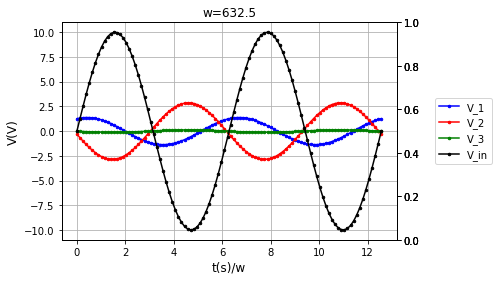

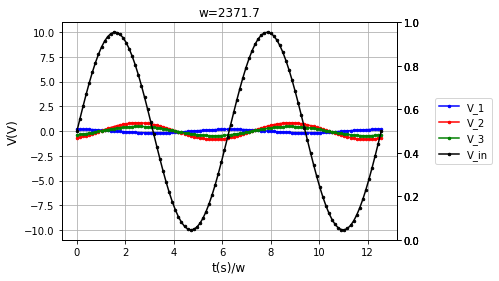

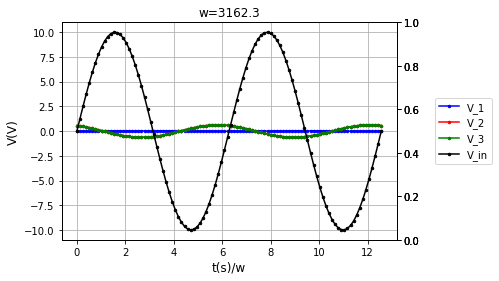

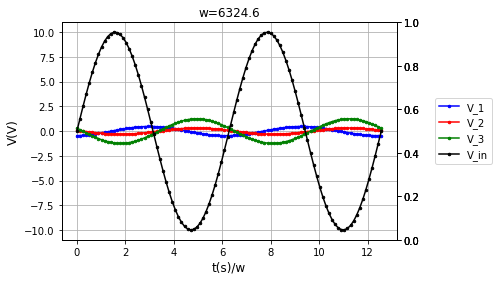

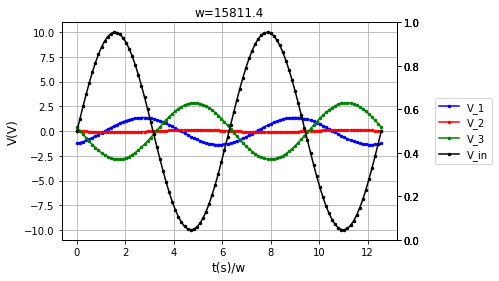

In [39]:
for j in range (0,size): 
    for i in range(0, size):
        V_1_plt[i]=V_1_plot(w[j],rand[i])
        V_2_plt[i]=V_2_plot(w[j],rand[i])
        V_3_plt[i]=V_3_plot(w[j],rand[i])
        V_0_plt[i]=V_0_plot(w[j],rand[i])       
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlabel('t(s)/w'             ##### etiqueta_eixo_x
               ,fontsize=12                ##### Fonte_do_eixo_x
              )                           
    plt.ylabel('V(V)'       ##### etiqueta_eixo_y
               ,fontsize=12                ##### Fonte_do_eixo_y
              )

    ax.plot(rand,V_1_plt                         ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
            ,'b'
            ,label='V_1'            ##### etiqueta serie de dados
            ,markersize=5                  ##### tamanho do marcador
            ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
           )
    ax.twinx()
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.plot(rand,V_2_plt                         ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
            ,'r'
            ,label='V_2'            ##### etiqueta serie de dados
            ,markersize=5                  ##### tamanho do marcador
            ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
           )
    ax.twinx()
    ax3 = fig.add_subplot(1, 1, 1)
    ax3.plot(rand,V_3_plt                         ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
            ,'g'
            ,label='V_3'            ##### etiqueta serie de dados
            ,markersize=5                  ##### tamanho do marcador
            ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
           )

    ax.twinx()
    ax4 = fig.add_subplot(1, 1, 1)
    ax4.plot(rand,V_0_plt                        ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
            ,'k'
            ,label='V_in'            ##### etiqueta serie de dados
            ,markersize=5                  ##### tamanho do marcador
            ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
           )
    ax.legend(loc='center left',                               ##### ativa as legendas
              bbox_to_anchor=(1.1, 0.5))
    plt.grid()
    plt.title('w='+str(w[j]))
    plt.savefig('d:\RLC_paralelo_w='+str(w[j])+".png",                           ##### salva a imagem no caminho especificado
            dpi = 300,                                    ##### tamanho do arquivo da imagem
            bbox_inches="tight")    